### Intro to Pandas

In [2]:
import pandas as pd


#Series
x = pd.Series([6,3,8,6],index=["q","w","e","r"])
x = pd.Series({"Tim":29,"Jim":31,"Pam":27,"Sam":35})
print(x,"\n")
print(x.index,"\n")
print(sorted(x.index),"\n")
x.reindex(sorted(x.index))
print(x,"\n","\n")


#DataFrame
data = {
    'name' : ["Tim","Jim","Pam","Sam"],
    'age' : [29,31,27,35],
    'ZIP' : ['02115','02130','67700','00100']
}
y = pd.DataFrame(data,columns=['name','age','ZIP'])
print(y['name'],"\n")
print(y.name,"\n")

Tim    29
Jim    31
Pam    27
Sam    35
dtype: int64 

Index(['Tim', 'Jim', 'Pam', 'Sam'], dtype='object') 

['Jim', 'Pam', 'Sam', 'Tim'] 

Tim    29
Jim    31
Pam    27
Sam    35
dtype: int64 
 

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object 

0    Tim
1    Jim
2    Pam
3    Sam
Name: name, dtype: object 



### DataFrame , Series additions

In [3]:
import pandas as pd

#Series
x = pd.Series([6,3,8,6],index=["q","w","e","r"])
y = pd.Series([7,3,5,2],index=["e","q","r","t"])
print(x+y)

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64


### Loading and Inspecting Data

In [4]:
import pandas as pd
import numpy as np

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
print(whisky.iloc[0:10,0:5])
print(whisky.columns)
flavours=whisky.iloc[:,2:14]
flavours

   RowID    Distillery  Body  Sweetness  Smoky
0      1     Aberfeldy     2          2      2
1      2      Aberlour     3          3      1
2      3        AnCnoc     1          3      2
3      4        Ardbeg     4          1      4
4      5       Ardmore     2          2      2
5      6   ArranIsleOf     2          3      1
6      7  Auchentoshan     0          2      0
7      8     Auchroisk     2          3      1
8      9      Aultmore     2          2      1
9     10      Balblair     2          3      2
Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'Region'],
      dtype='object')


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


### Exploring correlations

Flavours:

     Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0      2          2      2          0        0      2      1      2      2   
1      3          3      1          0        0      4      3      2      2   
2      1          3      2          0        0      2      0      0      2   
3      4          1      4          4        0      0      2      0      1   
4      2          2      2          0        0      1      1      1      2   
..   ...        ...    ...        ...      ...    ...    ...    ...    ...   
81     1          1      1          0        0      1      0      0      1   
82     2          3      2          0        0      2      2      1      1   
83     0          3      1          0        0      2      2      1      1   
84     2          2      1          0        0      1      0      1      2   
85     2          3      0          0        1      0      2      1      1   

    Malty  Fruity  Floral  
0       2       2      

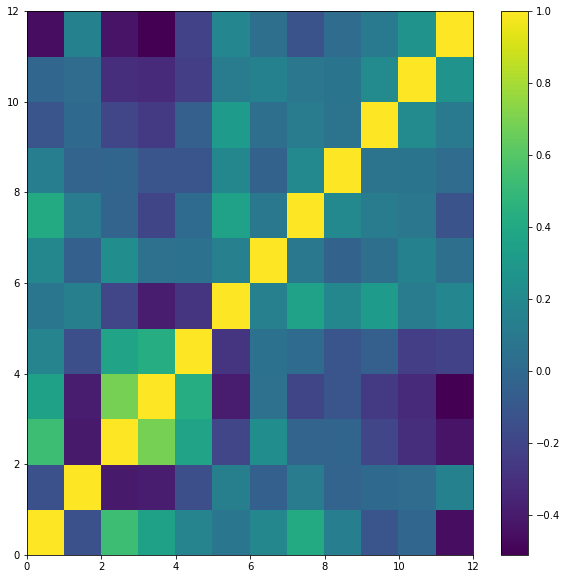

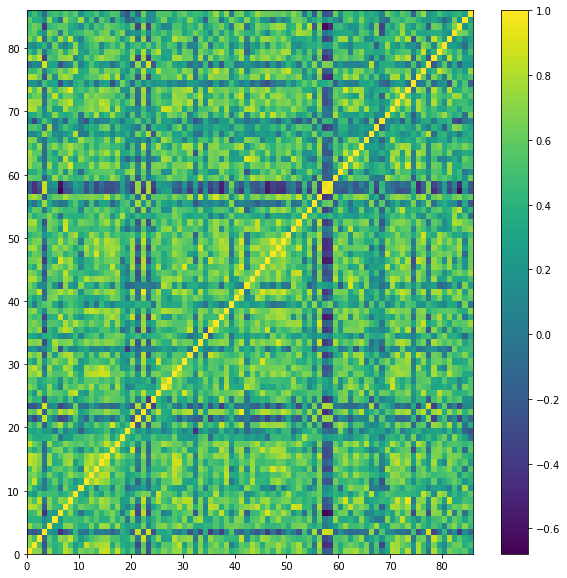

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
flavours=whisky.iloc[:,2:14]

corr_flavours = pd.DataFrame.corr(flavours)
print("Flavours:\n\n",flavours,"\n\n")
print("Correlations flavours:\n\n",corr_flavours,"\n\n")
plt.figure(figsize=(10,10))
plt.pcolor(corr_flavours)
plt.colorbar()


corr_whisky = pd.DataFrame.corr(flavours.transpose())
print("Whiskies:\n\n",flavours.transpose(),"\n\n")
print("Correlations whiskies:\n\n",corr_whisky,"\n\n")
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.colorbar()

### Clustering Whiskies By Flavor Profile


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralCoclustering


whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
flavours=whisky.iloc[:,2:14]
corr_whisky = pd.DataFrame.corr(flavours.transpose())


model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
print(model.rows_) #Rows = 6 clusters, #Columns = 86 whiskies
print(np.sum(model.rows_, axis=1)) #How many whiskies belongs to each clusters
print(np.sum(model.rows_, axis=0)) #No. of category that each whisky belongs to.
print(model.row_labels_)#To which cluster each whiskies as belongs to. (so, the value will be between 0 and 5)

[[False False False False False  True False False False False False  True
  False  True False False  True False  True False False False False False
  False False False False False False False False  True  True  True False
  False False  True False  True False False False False  True False  True
   True False False False False False  True False False False False  True
  False False False False False False False False False  True False False
   True False False False False False False False  True False False  True
  False  True]
 [False False False False False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False  True False  True False False False
  False False False Fal

### Comparing Correlation Matrices

Text(0.5, 1.0, 'Rearranged')

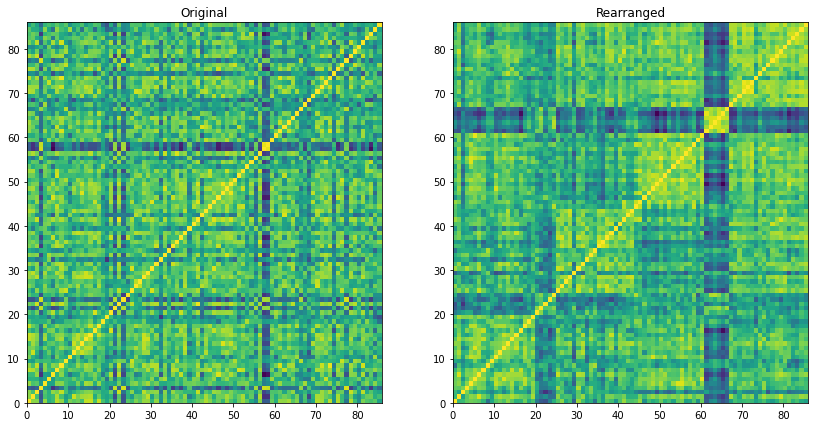

In [10]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)
correlations = np.array(pd.DataFrame.corr(whisky.iloc[:,2:14].transpose()))


plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")

In [8]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.reset_index(drop=True)
data

0    1
1    2
2    3
3    4
dtype: int64